In [6]:
import numpy as np
import matplotlib.pyplot as plt

#armaモデル
def extract_y_t(y_t_list :list,minus :int):
    if abs(minus) <= len(y_t_list):
        return y_t_list[minus]
    else:
        return 0

def arma_pq(y_0 :float, c :float, sigma :float, phi_list :list, theta_list :list, length: int) -> list:
    theta_list.insert(0,1)
    y_t_list = []
    noise_list = np.random.normal(0,sigma,length)
    for i in range(length):
        if i == 0:
            y_t_list.append(y_0)
        else:
            if i < len(theta_list):
                t = i
            else:
                t =  len(theta_list)           
            y_t = 0
            for n,phi in enumerate(phi_list):
                y_t += phi*extract_y_t(y_t_list,-(n+1))
            y_t_list.append(c+y_t+np.sum([noise_list[i-j]*theta_list[j] for j in range(t)]))
    return np.array(y_t_list)

#k次の自己共分散の値を計算
def autocovariance(k :int, ma1_array :np.array) -> np.array:
    auto_cov = np.cov(ma1_array[0:(len(ma1_array)-1)-k],ma1_array[0+k:(len(ma1_array)-1)],ddof=0)[0][1]
    return auto_cov

#k次の自己相関の値を計算
def autocorrelation(k :int, ma1_array :np.array) -> np.array:
    k_0 = autocovariance(0, ma1_array)
    k_k = autocovariance(k, ma1_array)
    return k_k/k_0

In [19]:
arma_22 = arma_pq(0, 0, 1, [0.3,0.5],  [0.3,0.5], 100000)

In [20]:
print(np.mean(arma_22))

0.001965487913518912


<BarContainer object of 20 artists>

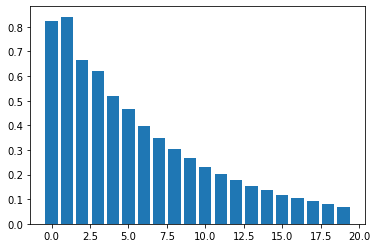

In [21]:
plt.bar([i for i in range(20)],[autocorrelation((i+1),arma_22) for i in range(20)])